In [35]:
import pandas as pd

def load_csv_from_url(url: str) -> pd.DataFrame:
    """
    –ó–∞–≥—Ä—É–∂–∞–µ—Ç CSV-—Ñ–∞–π–ª –ø–æ –ø—Ä—è–º–æ–π —Å—Å—ã–ª–∫–µ –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç DataFrame.
    """
    try:
        df = pd.read_csv(url)
        print("‚úÖ –î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã.\n")
        print(df.head())  # –í—ã–≤–æ–¥–∏–º –ø–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏
        return df
    except Exception as e:
        print(f"‚ùå –û—à–∏–±–∫–∞ –ø—Ä–∏ –∑–∞–≥—Ä—É–∑–∫–µ –¥–∞–Ω–Ω—ã—Ö: {e}")
        return None

# –í—ã–∑–æ–≤ —Ñ—É–Ω–∫—Ü–∏–∏ —Å –Ω—É–∂–Ω–æ–π —Å—Å—ã–ª–∫–æ–π
url = "https://dano.hse.ru/mirror/pubs/share/987942868.csv"
df = load_csv_from_url(url)


‚úÖ –î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã.

   customer_id   age gender_cd region_size  foreign_flg  entrepreneur_flg  \
0    422206773  58.0         F         NaN          NaN               NaN   
1    348648289  44.0         M       rural          0.0               0.0   
2    345496995  23.0         F        town          0.0               0.0   
3    182783192  34.0         M        town          0.0               0.0   
4    138498254  30.0         M         NaN          NaN               NaN   

   auto_flg  traveler_flg  partnership_flg  child_amt  ...  \
0       NaN           NaN              NaN        NaN  ...   
1       0.0           0.0              1.0        1.0  ...   
2       1.0           0.0              1.0        0.0  ...   
3       0.0           0.0              0.0        0.0  ...   
4       NaN           NaN              NaN        NaN  ...   

  state_talk_time_sec wo_hit_status_result_desc  \
0                67.0             –î–æ–∑–≤–æ–Ω, –û—Ç–∫–∞–∑  

In [14]:
print(df.sample(10))

       customer_id   age gender_cd region_size  foreign_flg  entrepreneur_flg  \
3826     391853140  29.0         F         NaN          NaN               NaN   
9277     295362301  38.0         M         NaN          NaN               NaN   
1327     471362673  71.0         F         msk          0.0               1.0   
5402     500162224  40.0         F        town          0.0               0.0   
5172     174793520  29.0         M       urban          0.0               0.0   
5753     160678847  25.0         M       urban          0.0               1.0   
10898    505216398  25.0         M        town          0.0               0.0   
8954     526359769  35.0         F         msk          0.0               0.0   
2414     191634796  35.0         M        town          0.0               0.0   
1015     172484413  35.0         M         NaN          NaN               NaN   

       auto_flg  traveler_flg  partnership_flg  child_amt  ...  \
3826        NaN           NaN             

In [36]:
print(df.dtypes)

customer_id                     int64
age                            object
gender_cd                      object
region_size                    object
foreign_flg                   float64
entrepreneur_flg              float64
auto_flg                      float64
traveler_flg                  float64
partnership_flg               float64
child_amt                     float64
realty_type                    object
segment_cd                     object
bundle_nm                      object
confirmed_income              float64
predicted_income              float64
product_cd                     object
functional_cd                  object
finish_dttm                    object
state_talk_time_sec           float64
wo_hit_status_result_desc      object
wo_hit_status_reason_desc      object
employee_id                   float64
emp_age                         int64
emp_gender_cd                  object
emp_children_cnt              float64
emp_work_months_cnt             int64
emp_citizens

In [37]:
def clean_column_types(df: pd.DataFrame) -> pd.DataFrame:
    """
    –ü—Ä–∏–≤–æ–¥–∏—Ç –¥–∞–Ω–Ω—ã–µ –∫ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º —Ç–∏–ø–∞–º:
    - age –∏ employee_id ‚Üí pandas Int64 (—Å –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π NaN)
    - finish_dttm ‚Üí datetime
    """
    df = df.copy()

    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ age
    df['age'] = pd.to_numeric(df['age'], errors='coerce').round().astype('Int64')

    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ employee_id (–ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ —É–±–∏—Ä–∞–µ–º —Ç–æ—á–∫–∏)
    df['employee_id'] = pd.to_numeric(df['employee_id'], errors='coerce').round().astype('Int64')

    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ finish_dttm –≤ datetime
    df['finish_dttm'] = pd.to_datetime(df['finish_dttm'], errors='coerce')

    print("‚úÖ –¢–∏–ø—ã –∫–æ–ª–æ–Ω–æ–∫ –æ–±–Ω–æ–≤–ª–µ–Ω—ã.\n")
    print(df.dtypes)
    
    return df

# –í—ã–∑–æ–≤ —Ñ—É–Ω–∫—Ü–∏–∏
df = clean_column_types(df)


‚úÖ –¢–∏–ø—ã –∫–æ–ª–æ–Ω–æ–∫ –æ–±–Ω–æ–≤–ª–µ–Ω—ã.

customer_id                            int64
age                                    Int64
gender_cd                             object
region_size                           object
foreign_flg                          float64
entrepreneur_flg                     float64
auto_flg                             float64
traveler_flg                         float64
partnership_flg                      float64
child_amt                            float64
realty_type                           object
segment_cd                            object
bundle_nm                             object
confirmed_income                     float64
predicted_income                     float64
product_cd                            object
functional_cd                         object
finish_dttm                   datetime64[ns]
state_talk_time_sec                  float64
wo_hit_status_result_desc             object
wo_hit_status_reason_desc             object
employ

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 18691 non-null  int64         
 1   age                         18508 non-null  Int64         
 2   gender_cd                   18433 non-null  object        
 3   region_size                 11402 non-null  object        
 4   foreign_flg                 11402 non-null  float64       
 5   entrepreneur_flg            11402 non-null  float64       
 6   auto_flg                    11402 non-null  float64       
 7   traveler_flg                11402 non-null  float64       
 8   partnership_flg             11402 non-null  float64       
 9   child_amt                   11402 non-null  float64       
 10  realty_type                 11402 non-null  object        
 11  segment_cd                  11402 non-null  object    

–ü–æ–ª–Ω—ã—Ö —Å—Ç—Ä–æ–∫: 11402
–ù–µ–ø–æ–ª–Ω—ã—Ö —Å—Ç—Ä–æ–∫: 7289

–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü: age
–ì—Ä—É–ø–ø–∞ 1:
count      11367.0
mean      36.66086
std      11.777901
min           13.0
25%           28.0
50%           36.0
75%           44.0
max           83.0
Name: age, dtype: Float64
–ì—Ä—É–ø–ø–∞ 2:
count       7141.0
mean     40.219297
std       13.05082
min            8.0
25%           31.0
50%           39.0
75%           49.0
max           85.0
Name: age, dtype: Float64
t-—Ç–µ—Å—Ç: p-value = 0.0000

–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü: predicted_income
–ì—Ä—É–ø–ø–∞ 1:
count      3235.000000
mean      16892.313614
std        6361.623295
min        7823.500000
25%       12938.100000
50%       15323.500000
75%       18600.460000
max      107823.500000
Name: predicted_income, dtype: float64
–ì—Ä—É–ø–ø–∞ 2:
count    8.520000e+02
mean     3.449241e+07
std      1.006370e+09
min     -6.274500e+03
25%      1.232350e+04
50%      1.387153e+04
75%      1.595927e+04
max      2.937498e+1

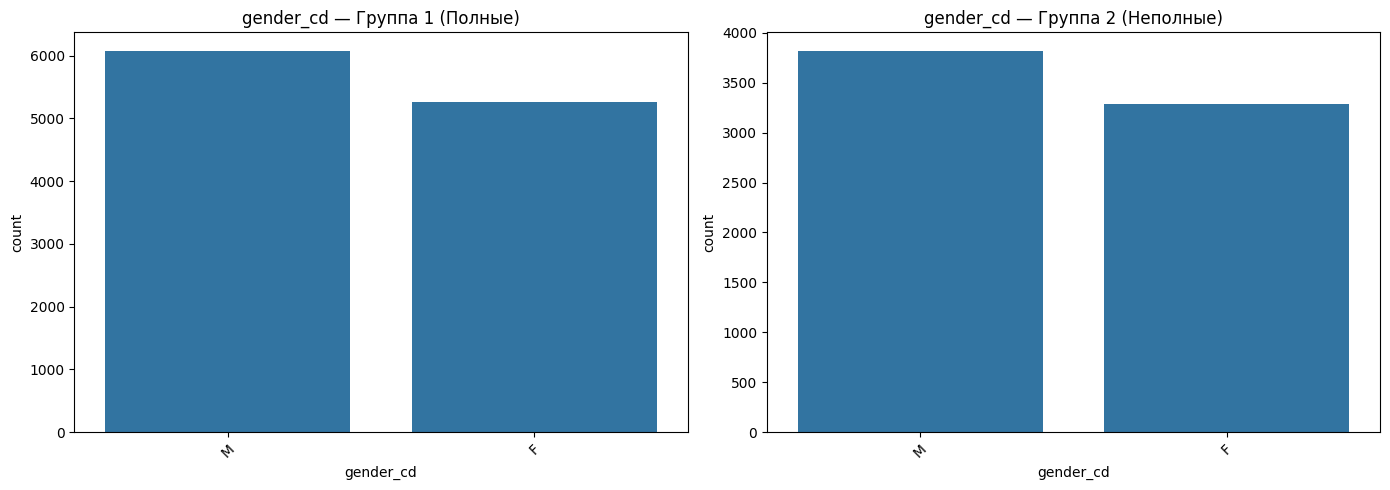

‚úÖ Chi¬≤-—Ç–µ—Å—Ç –ø–æ gender_cd: p-value = 0.8552

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü: region_size
             –ì—Ä—É–ø–ø–∞ 1  –ì—Ä—É–ø–ø–∞ 2
region_size                    
town         0.530959       0.0
urban        0.233380       0.0
msk          0.136730       0.0
rural        0.098930       0.0


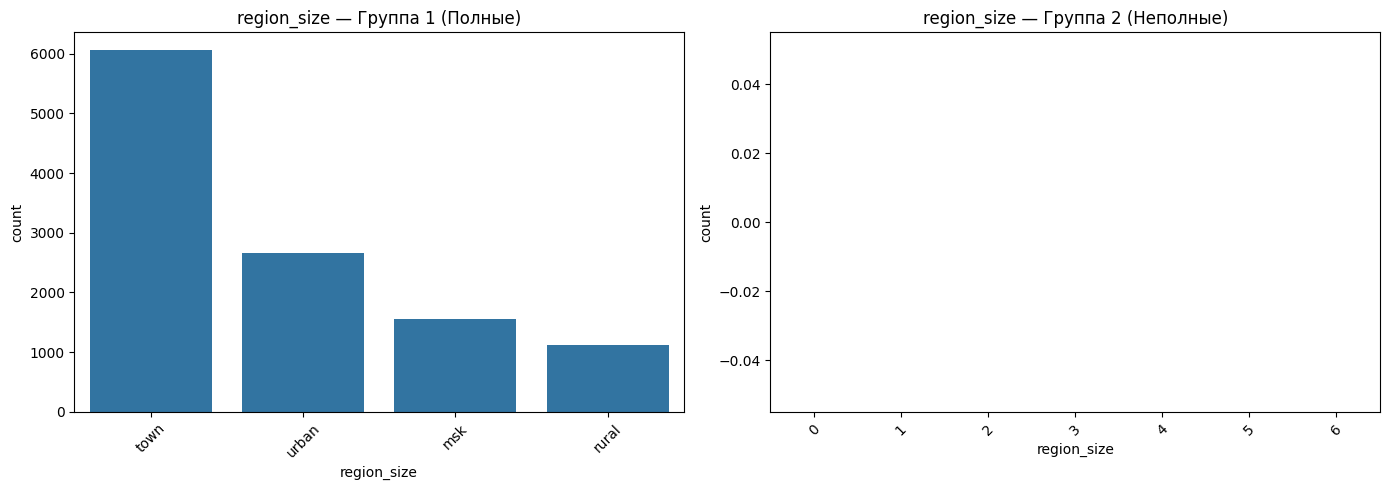

‚úÖ Chi¬≤-—Ç–µ—Å—Ç –ø–æ region_size: p-value = 1.0000

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü: realty_type
                  –ì—Ä—É–ø–ø–∞ 1  –ì—Ä—É–ø–ø–∞ 2
realty_type                         
–ö–≤–∞—Ä—Ç–∏—Ä–∞          0.502631       0.0
–ù–µ—Ç —Å–≤–æ–µ–≥–æ –∂–∏–ª—å—è  0.477548       0.0
–ñ–∏–ª–æ–π –¥–æ–º         0.011402       0.0
–ö–æ–º–Ω–∞—Ç–∞           0.008420       0.0


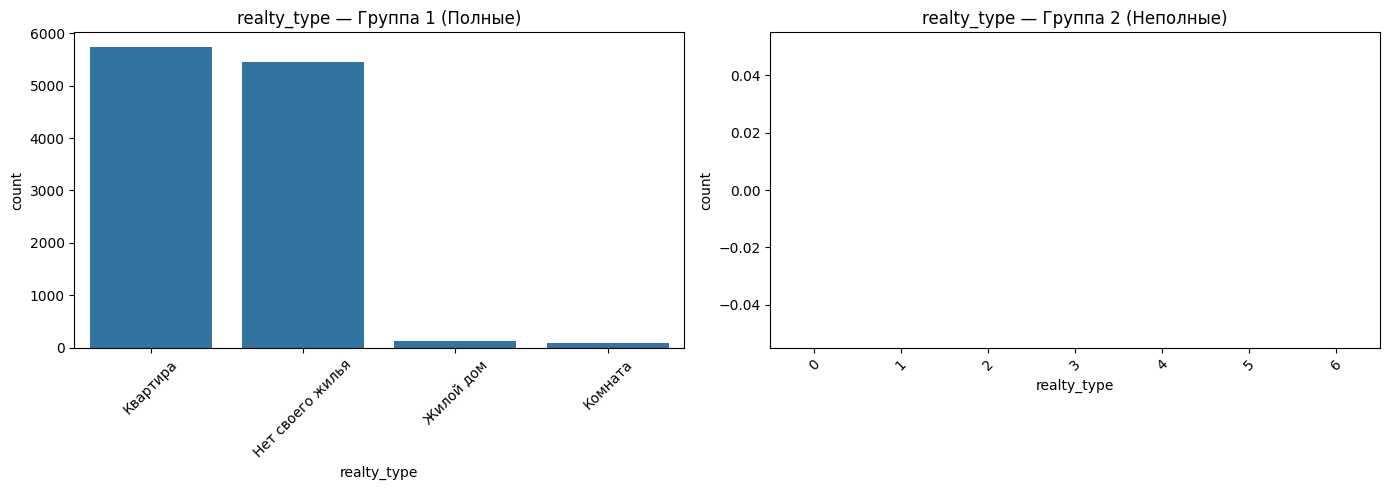

‚úÖ Chi¬≤-—Ç–µ—Å—Ç –ø–æ realty_type: p-value = 1.0000

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü: functional_cd
               –ì—Ä—É–ø–ø–∞ 1  –ì—Ä—É–ø–ø–∞ 2
functional_cd                    
Preapprove     0.450886  0.532858
Afterfilling   0.144273  0.096995
Utilization    0.095773  0.085746
Upsell         0.091300  0.041295
Cold           0.063410  0.111675
Meeting        0.049904  0.067911
Agreement      0.037713  0.016052
Incoming       0.017453  0.022225
Reutilization  0.016751  0.005076
Downsell       0.013419  0.010427
Activation     0.007806  0.000960
Autoleads      0.004034  0.000137
Prolongation   0.003508  0.001235
BAF            0.002807  0.007271
Deposit        0.000877  0.000137
Refinancing    0.000088  0.000000


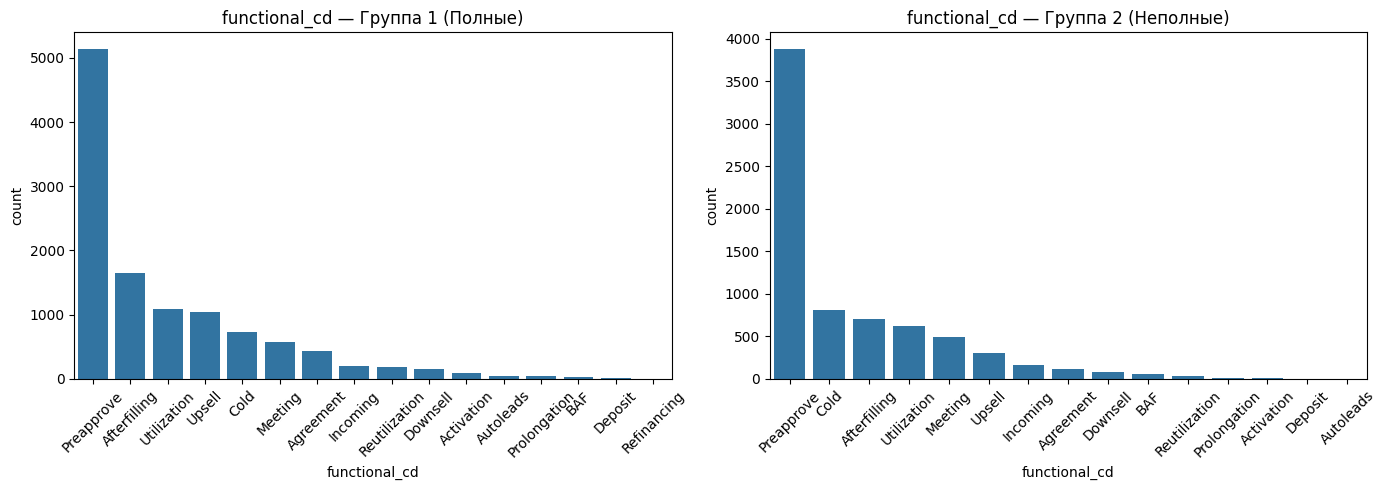

‚úÖ Chi¬≤-—Ç–µ—Å—Ç –ø–æ functional_cd: p-value = 0.0000

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü: wo_hit_status_result_desc
                           –ì—Ä—É–ø–ø–∞ 1  –ì—Ä—É–ø–ø–∞ 2
wo_hit_status_result_desc                    
–î–æ–∑–≤–æ–Ω, –û—Ç–∫–∞–∑              0.860902  0.885993
–î–æ–∑–≤–æ–Ω, –£—Å–ø–µ—à–Ω–æ            0.139098  0.114007


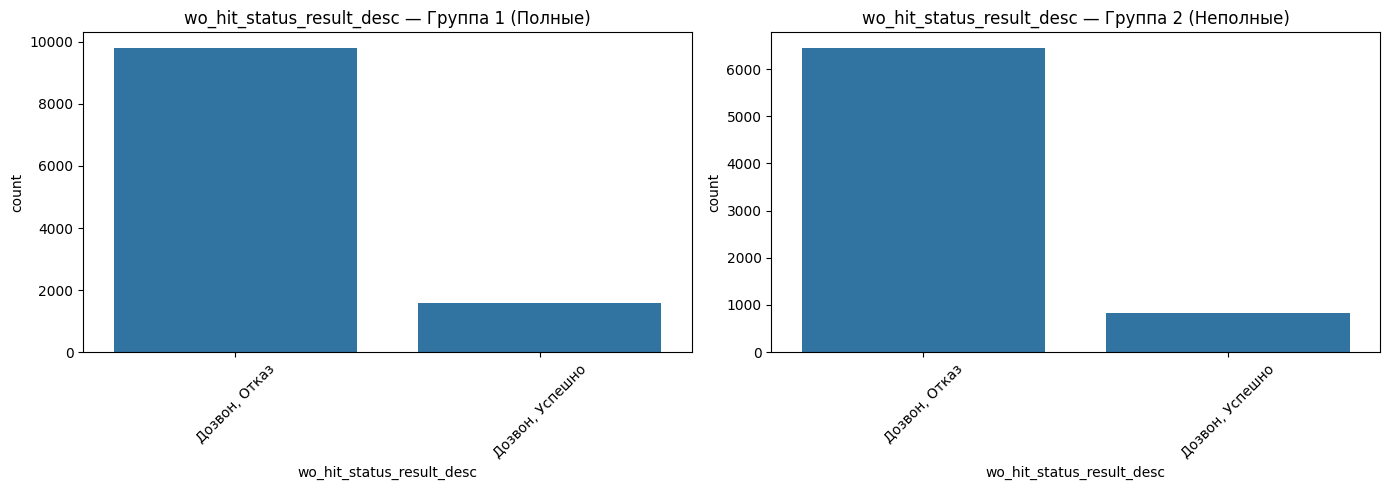

‚úÖ Chi¬≤-—Ç–µ—Å—Ç –ø–æ wo_hit_status_result_desc: p-value = 0.0000


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency

def split_by_completeness(df):
    key_fields = [
        'region_size', 'foreign_flg', 'auto_flg', 'traveler_flg',
        'partnership_flg', 'child_amt', 'realty_type', 'segment_cd'
    ]
    full_mask = df[key_fields].notnull().all(axis=1)
    df_full = df[full_mask].copy()
    df_partial = df[~full_mask].copy()

    print(f"–ü–æ–ª–Ω—ã—Ö —Å—Ç—Ä–æ–∫: {len(df_full)}")
    print(f"–ù–µ–ø–æ–ª–Ω—ã—Ö —Å—Ç—Ä–æ–∫: {len(df_partial)}")

    return df_full, df_partial

def compare_numeric_stats(df1, df2, numeric_cols):
    for col in numeric_cols:
        print(f"\n–ß–∏—Å–ª–æ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü: {col}")
        print("–ì—Ä—É–ø–ø–∞ 1:")
        print(df1[col].describe())
        print("–ì—Ä—É–ø–ø–∞ 2:")
        print(df2[col].describe())

        a = df1[col].dropna()
        b = df2[col].dropna()
        if len(a) > 10 and len(b) > 10:
            stat, p = ttest_ind(a, b, equal_var=False)
            print(f"t-—Ç–µ—Å—Ç: p-value = {p:.4f}")
        else:
            print("–ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è t-—Ç–µ—Å—Ç–∞.")

def compare_categorical_stats(df1, df2, cat_cols):
    for col in cat_cols:
        print(f"\n–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü: {col}")

        ctab1 = df1[col].value_counts(normalize=True)
        ctab2 = df2[col].value_counts(normalize=True)
        compare_df = pd.concat([ctab1, ctab2], axis=1, keys=['–ì—Ä—É–ø–ø–∞ 1', '–ì—Ä—É–ø–ø–∞ 2'])
        print(compare_df.fillna(0))

        # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        sns.countplot(data=df1, x=col, ax=ax[0], order=df1[col].value_counts().index)
        ax[0].set_title(f'{col} ‚Äî –ì—Ä—É–ø–ø–∞ 1 (–ü–æ–ª–Ω—ã–µ)')
        ax[0].tick_params(axis='x', rotation=45)

        sns.countplot(data=df2, x=col, ax=ax[1], order=df2[col].value_counts().index)
        ax[1].set_title(f'{col} ‚Äî –ì—Ä—É–ø–ø–∞ 2 (–ù–µ–ø–æ–ª–Ω—ã–µ)')
        ax[1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

        # Chi¬≤ —Ç–µ—Å—Ç
        combined = pd.concat([
            df1[[col]].assign(group='–ì—Ä—É–ø–ø–∞ 1'),
            df2[[col]].assign(group='–ì—Ä—É–ø–ø–∞ 2')
        ])
        contingency = pd.crosstab(combined['group'], combined[col])

        # –£–¥–∞–ª–∏–º –∫–æ–ª–æ–Ω–∫–∏, –≥–¥–µ —Ö–æ—Ç—è –±—ã –æ–¥–Ω–∞ —Å—Ç—Ä–æ–∫–∞ = 0
        contingency = contingency.loc[:, (contingency != 0).all(axis=0)]

        if contingency.shape[1] > 1:
            chi2, p, _, _ = chi2_contingency(contingency)
            print(f"‚úÖ Chi¬≤-—Ç–µ—Å—Ç –ø–æ {col}: p-value = {p:.4f}")
        else:
            print("‚ùå –ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ–±—â–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π –¥–ª—è chi¬≤-—Ç–µ—Å—Ç–∞.")

# --- –í—ã–∑–æ–≤ ---
df_full, df_partial = split_by_completeness(df)

numeric_columns = ['age', 'predicted_income', 'state_talk_time_sec']
categorical_columns = ['gender_cd', 'region_size', 'realty_type', 'functional_cd', 'wo_hit_status_result_desc']

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ
compare_numeric_stats(df_full, df_partial, numeric_columns)
compare_categorical_stats(df_full, df_partial, categorical_columns)

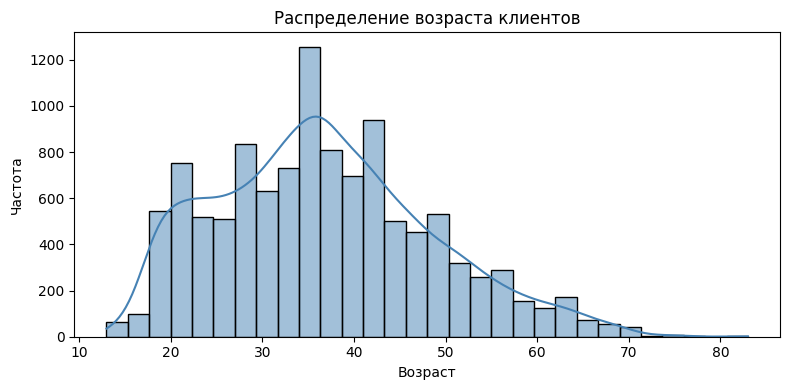

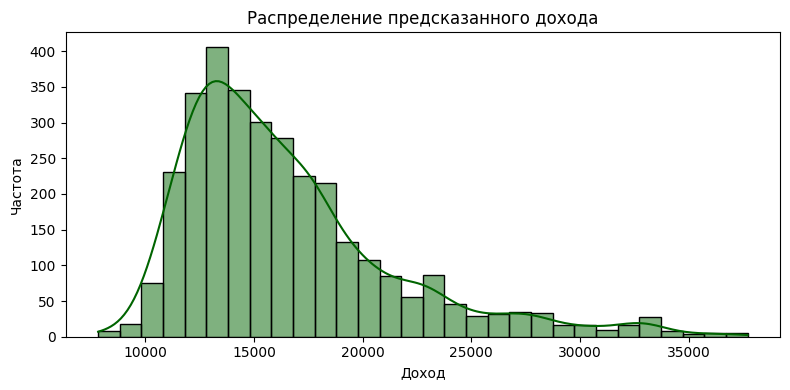

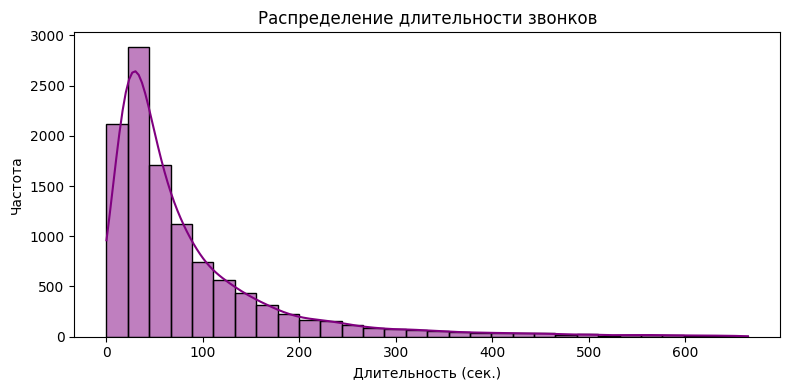

In [56]:
def plot_age_distribution(df):
    """
    –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –∏ KDE-–ø–ª–æ—Ç–Ω–æ—Å—Ç—å –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É –∫–ª–∏–µ–Ω—Ç–æ–≤
    """
    plt.figure(figsize=(8, 4))
    sns.histplot(df['age'].dropna(), bins=30, kde=True, color='steelblue')
    plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤')
    plt.xlabel('–í–æ–∑—Ä–∞—Å—Ç')
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    plt.tight_layout()
    plt.show()

def plot_predicted_income(df):
    """
    –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –¥–æ—Ö–æ–¥–∞ (–±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤)
    """
    data = df['predicted_income'].dropna()
    data = data[data < data.quantile(0.99)]  # —É–±–µ—Ä—ë–º –≤–µ—Ä—Ö–Ω–∏–µ 1% –∫–∞–∫ –≤—ã–±—Ä–æ—Å—ã

    plt.figure(figsize=(8, 4))
    sns.histplot(data, bins=30, kde=True, color='darkgreen')
    plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–≥–æ –¥–æ—Ö–æ–¥–∞')
    plt.xlabel('–î–æ—Ö–æ–¥')
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    plt.tight_layout()
    plt.show()

def plot_talk_time(df):
    """
    –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∑–≤–æ–Ω–∫–æ–≤ (–≤ —Å–µ–∫—É–Ω–¥–∞—Ö)
    """
    data = df['state_talk_time_sec'].dropna()
    data = data[data < data.quantile(0.99)]  # —É–±–∏—Ä–∞–µ–º –≤—ã–±—Ä–æ—Å—ã

    plt.figure(figsize=(8, 4))
    sns.histplot(data, bins=30, kde=True, color='purple')
    plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∑–≤–æ–Ω–∫–æ–≤')
    plt.xlabel('–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å (—Å–µ–∫.)')
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    plt.tight_layout()
    plt.show()

plot_age_distribution(df_full)
plot_predicted_income(df_full)
plot_talk_time(df_full)



üìä –î–æ–ª—è —É—Å–ø–µ—à–Ω—ã—Ö —Ö–æ–ª–æ–¥–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:
region_size
urban    0.135870
msk      0.125000
town     0.122137
rural    0.108108
Name: success, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_35608\3841839115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cold_df['success'] = cold_df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False)


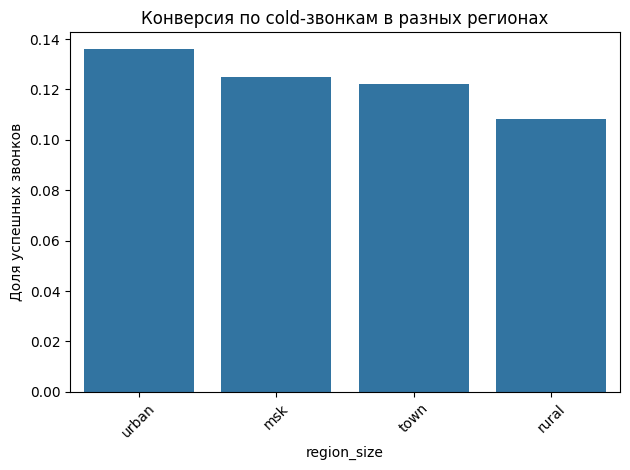


üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Upsell –ø–æ –≥—Ä—É–ø–ø–∞–º (–±–æ–≥–∞—Ç—ã–µ / –æ—Å—Ç–∞–ª—å–Ω—ã–µ):
group
–ë–æ–≥–∞—Ç—ã–µ      0.067308
–û—Å—Ç–∞–ª—å–Ω—ã–µ    0.077908
Name: success, dtype: float64


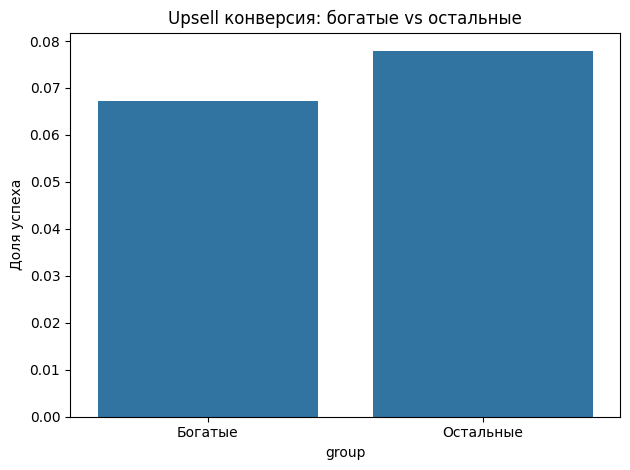

In [40]:
def analyze_cold_calls_by_region(df):
    """
    –°—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç –¥–æ–ª—é —É—Å–ø–µ—Ö–∞ –ø–æ —Ö–æ–ª–æ–¥–Ω—ã–º –∑–≤–æ–Ω–∫–∞–º –≤ –ú–æ—Å–∫–≤–µ –∏ –¥—Ä—É–≥–∏—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö.
    """
    cold_df = df[df['functional_cd'] == 'Cold']
    cold_df['success'] = cold_df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False)

    region_grouped = cold_df.groupby('region_size')['success'].mean().sort_values(ascending=False)
    print("\nüìä –î–æ–ª—è —É—Å–ø–µ—à–Ω—ã—Ö —Ö–æ–ª–æ–¥–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:")
    print(region_grouped)

    sns.barplot(x=region_grouped.index, y=region_grouped.values)
    plt.title("–ö–æ–Ω–≤–µ—Ä—Å–∏—è –ø–æ cold-–∑–≤–æ–Ω–∫–∞–º –≤ —Ä–∞–∑–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö")
    plt.ylabel("–î–æ–ª—è —É—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def analyze_upsell_for_rich_clients(df):
    """
    –°—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç —É—Å–ø–µ—Ö –∑–≤–æ–Ω–∫–æ–≤ Upsell —É '–±–æ–≥–∞—Ç—ã—Ö' –∏ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.
    """
    # –ö—Ä–∏—Ç–µ—Ä–∏–∏ "–±–æ–≥–∞—Ç—Å—Ç–≤–∞"
    rich_mask = (
        (df['realty_type'] == '–ö–≤–∞—Ä—Ç–∏—Ä–∞') &
        (df['auto_flg'] == 1.0) &
        (df['region_size'].isin(['urban', 'msk']))
    )

    upsell_df = df[df['functional_cd'] == 'Upsell'].copy()
    upsell_df['success'] = upsell_df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False)
    upsell_df['group'] = np.where(rich_mask.loc[upsell_df.index], '–ë–æ–≥–∞—Ç—ã–µ', '–û—Å—Ç–∞–ª—å–Ω—ã–µ')

    result = upsell_df.groupby('group')['success'].mean()
    print("\nüìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Upsell –ø–æ –≥—Ä—É–ø–ø–∞–º (–±–æ–≥–∞—Ç—ã–µ / –æ—Å—Ç–∞–ª—å–Ω—ã–µ):")
    print(result)

    sns.barplot(x=result.index, y=result.values)
    plt.title("Upsell –∫–æ–Ω–≤–µ—Ä—Å–∏—è: –±–æ–≥–∞—Ç—ã–µ vs –æ—Å—Ç–∞–ª—å–Ω—ã–µ")
    plt.ylabel("–î–æ–ª—è —É—Å–ø–µ—Ö–∞")
    plt.tight_layout()
    plt.show()

analyze_cold_calls_by_region(df_full)
analyze_upsell_for_rich_clients(df_full)



üìä –î–æ–ª—è —É—Å–ø–µ—à–Ω—ã—Ö —Ö–æ–ª–æ–¥–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:
region_size
urban    0.135870
msk      0.125000
town     0.122137
rural    0.108108
Name: success, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_35608\703146630.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_grouped.index, y=region_grouped.values, palette="coolwarm")


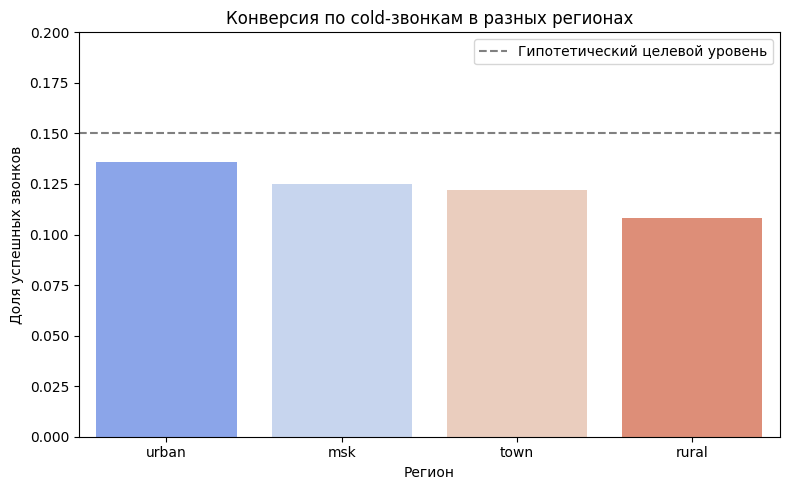


üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Upsell –ø–æ –≥—Ä—É–ø–ø–∞–º (–±–æ–≥–∞—Ç—ã–µ / –æ—Å—Ç–∞–ª—å–Ω—ã–µ):
group
–ë–æ–≥–∞—Ç—ã–µ      0.067308
–û—Å—Ç–∞–ª—å–Ω—ã–µ    0.077908
Name: success, dtype: float64


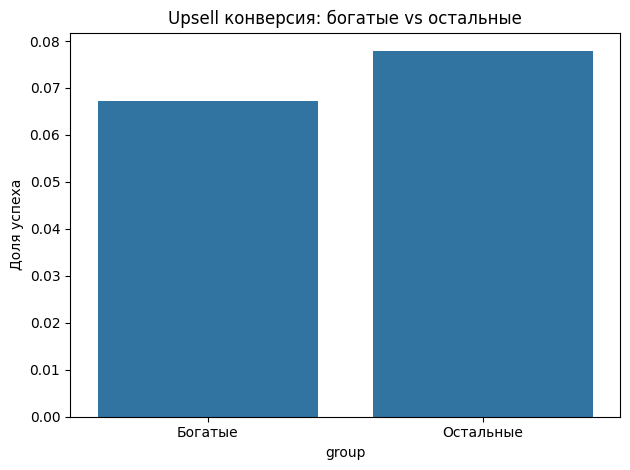

In [25]:
def analyze_cold_calls_by_region(df):
    """
    –°—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç –¥–æ–ª—é —É—Å–ø–µ—Ö–∞ –ø–æ —Ö–æ–ª–æ–¥–Ω—ã–º –∑–≤–æ–Ω–∫–∞–º –≤ –ú–æ—Å–∫–≤–µ –∏ –¥—Ä—É–≥–∏—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö.
    –ü–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è.
    """
    cold_df = df[df['functional_cd'] == 'Cold'].copy()  # –ö–æ–ø–∏—Ä—É–µ–º —è–≤–Ω–æ
    cold_df['success'] = cold_df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False, na=False)

    region_grouped = cold_df.groupby('region_size')['success'].mean().sort_values(ascending=False)
    print("\nüìä –î–æ–ª—è —É—Å–ø–µ—à–Ω—ã—Ö —Ö–æ–ª–æ–¥–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:")
    print(region_grouped)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=region_grouped.index, y=region_grouped.values, palette="coolwarm")
    plt.title("–ö–æ–Ω–≤–µ—Ä—Å–∏—è –ø–æ cold-–∑–≤–æ–Ω–∫–∞–º –≤ —Ä–∞–∑–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö")
    plt.ylabel("–î–æ–ª—è —É—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤")
    plt.xlabel("–†–µ–≥–∏–æ–Ω")
    plt.ylim(0, 0.2)
    plt.axhline(0.15, color='gray', linestyle='--', label='–ì–∏–ø–æ—Ç–µ—Ç–∏—á–µ—Å–∫–∏–π —Ü–µ–ª–µ–≤–æ–π —É—Ä–æ–≤–µ–Ω—å')
    plt.legend()
    plt.tight_layout()
    plt.show()

analyze_cold_calls_by_region(df_full)
analyze_upsell_for_rich_clients(df_full)

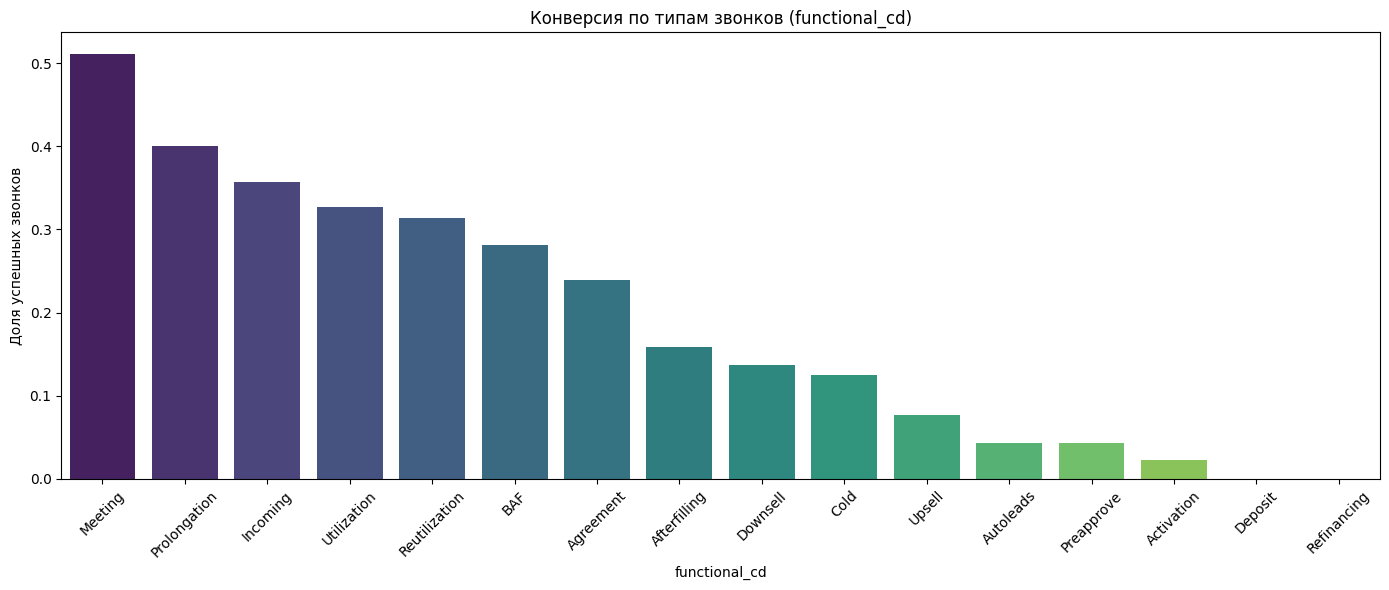

In [41]:
def plot_call_type_success(df):
    """
    –ü–æ–∫–∞–∑—ã–≤–∞–µ—Ç –¥–æ–ª—é —É—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤ –ø–æ –≤—Å–µ–º —Ç–∏–ø–∞–º –∑–≤–æ–Ω–∫–æ–≤ (functional_cd).
    """
    df = df.copy()
    df['success'] = df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False, na=False)

    grouped = df.groupby('functional_cd')['success'].mean().sort_values(ascending=False)

    plt.figure(figsize=(14, 6))
    sns.barplot(x=grouped.index, y=grouped.values, hue=grouped.index, dodge=False, legend=False, palette="viridis")
    plt.title("–ö–æ–Ω–≤–µ—Ä—Å–∏—è –ø–æ —Ç–∏–ø–∞–º –∑–≤–æ–Ω–∫–æ–≤ (functional_cd)")
    plt.ylabel("–î–æ–ª—è —É—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_call_type_success(df_full)



üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Autoleads –ø–æ: –¢–∏–ø –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏
realty_type
–ñ–∏–ª–æ–π –¥–æ–º           0.333333
–ö–≤–∞—Ä—Ç–∏—Ä–∞            0.000000
–ù–µ—Ç —Å–≤–æ–µ–≥–æ –∂–∏–ª—å—è    0.058824
Name: success, dtype: float64


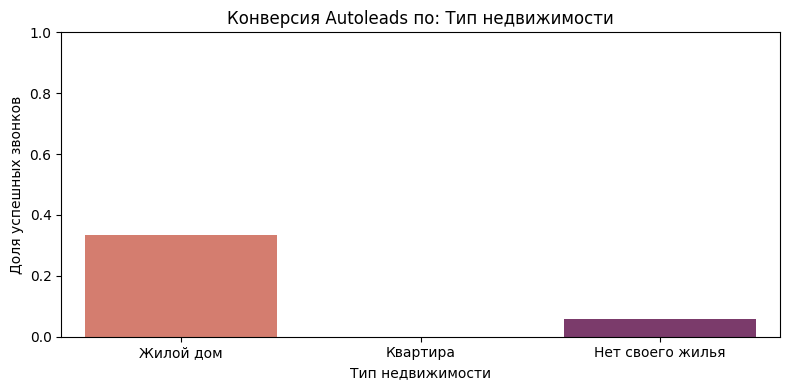


üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Autoleads –ø–æ: –†–µ–≥–∏–æ–Ω
region_size
msk      0.000000
rural    0.000000
town     0.076923
urban    0.000000
Name: success, dtype: float64


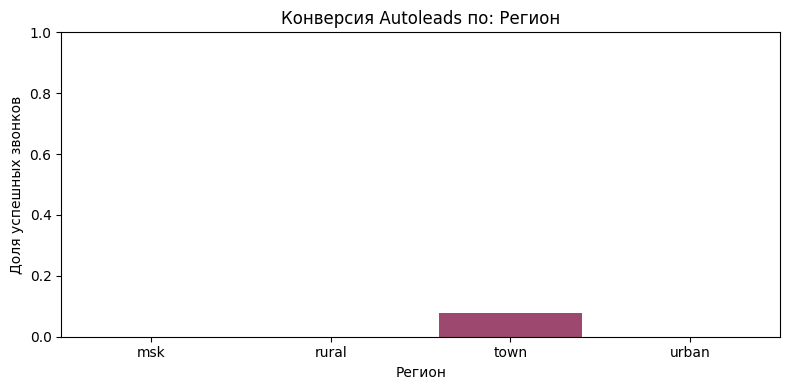


üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Autoleads –ø–æ: –ù–∞–ª–∏—á–∏–µ –∞–≤—Ç–æ
auto_flg
0.0    0.050000
1.0    0.038462
Name: success, dtype: float64


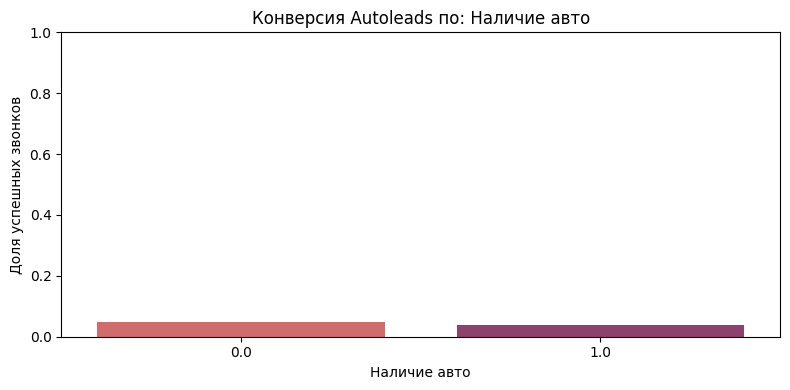


üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Autoleads –ø–æ: –í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞
age_group
<25      0.166667
25‚Äì35    0.000000
36‚Äì50    0.045455
51‚Äì65    0.000000
65+      0.000000
Name: success, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_35608\2119024388.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = auto_df.groupby(col)['success'].mean()


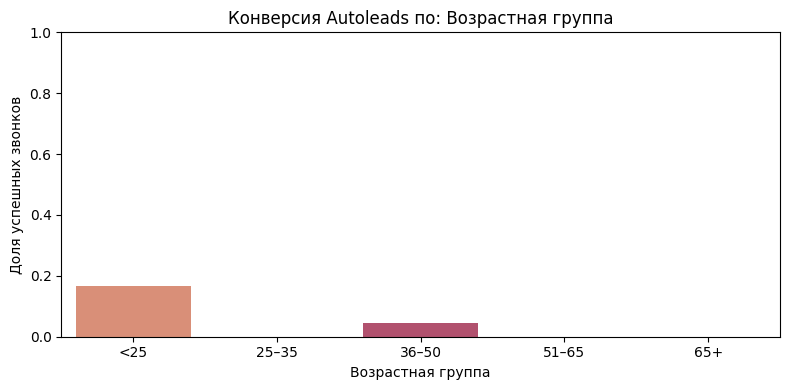

In [46]:
def analyze_autoleads_response(df):
    """
    –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç –æ—Ç–∫–ª–∏–∫ –Ω–∞ –∑–≤–æ–Ω–∫–∏ —Å —Ü–µ–ª—å—é Autoleads –ø–æ:
    - —Ç–∏–ø—É –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏
    - —Ä–µ–≥–∏–æ–Ω—É
    - –Ω–∞–ª–∏—á–∏—é –∞–≤—Ç–æ–º–æ–±–∏–ª—è
    - –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º
    """
    df = df.copy()
    auto_df = df[df['functional_cd'] == 'Autoleads'].copy()

    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è —Ç–∞–∫–∏—Ö –∑–≤–æ–Ω–∫–æ–≤
    if auto_df.empty:
        print("‚ùå –ù–µ—Ç –∑–≤–æ–Ω–∫–æ–≤ —Å —Ç–∏–ø–æ–º 'Autoleads' –≤ –¥–∞–Ω–Ω—ã—Ö.")
        return

    # –û—Ç–º–µ—Ç–∫–∞ —É—Å–ø–µ—Ö–∞
    auto_df.loc[:, 'success'] = auto_df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False, na=False)

    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —É—Å–ø–µ—à–Ω–æ—Å—Ç—å
    if auto_df['success'].sum() == 0:
        print("‚ö†Ô∏è –ù–∏ –æ–¥–Ω–æ–≥–æ —É—Å–ø–µ—à–Ω–æ–≥–æ –∑–≤–æ–Ω–∫–∞ —Å —Ü–µ–ª—å—é 'Autoleads' –Ω–µ –Ω–∞–π–¥–µ–Ω–æ.")
        return

    # –í–æ–∑—Ä–∞—Å—Ç–Ω—ã–µ –≥—Ä—É–ø–ø—ã
    bins = [0, 25, 35, 50, 65, 100]
    labels = ['<25', '25‚Äì35', '36‚Äì50', '51‚Äì65', '65+']
    auto_df.loc[:, 'age_group'] = pd.cut(auto_df['age'], bins=bins, labels=labels)

    # –•–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
    features = {
        'realty_type': '–¢–∏–ø –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏',
        'region_size': '–†–µ–≥–∏–æ–Ω',
        'auto_flg': '–ù–∞–ª–∏—á–∏–µ –∞–≤—Ç–æ',
        'age_group': '–í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞'
    }

    for col, title in features.items():
        grouped = auto_df.groupby(col)['success'].mean()

        print(f"\nüìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Autoleads –ø–æ: {title}")
        print(grouped)

        plt.figure(figsize=(8, 4))
        sns.barplot(x=grouped.index.astype(str), y=grouped.values, hue=grouped.index, palette='flare', legend=False)
        plt.title(f'–ö–æ–Ω–≤–µ—Ä—Å–∏—è Autoleads –ø–æ: {title}')
        plt.ylabel('–î–æ–ª—è —É—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤')
        plt.xlabel(title)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()

analyze_autoleads_response(df_full)
        


In [48]:
def count_upsell_calls(df):
    """
    –°—á–∏—Ç–∞–µ—Ç –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ —Å —Ü–µ–ª—å—é Upsell
    –∏ —Å–∫–æ–ª—å–∫–æ –∏–∑ –Ω–∏—Ö –±—ã–ª–∏ —É—Å–ø–µ—à–Ω—ã–º–∏.
    """
    upsell_df = df[df['functional_cd'] == 'Upsell'].copy()
    total = len(upsell_df)
    successful = upsell_df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False, na=False).sum()

    print(f"üìû –í—Å–µ–≥–æ –∑–≤–æ–Ω–∫–æ–≤ —Å Upsell: {total}")
    print(f"‚úÖ –£—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤: {successful}")
    if total > 0:
        print(f"üéØ –ö–æ–Ω–≤–µ—Ä—Å–∏—è: {successful / total:.2%}")
    else:
        print("‚ö†Ô∏è –ó–≤–æ–Ω–∫–æ–≤ —Å Upsell –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç.")

count_upsell_calls(df_full)


üìû –í—Å–µ–≥–æ –∑–≤–æ–Ω–∫–æ–≤ —Å Upsell: 1041
‚úÖ –£—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤: 80
üéØ –ö–æ–Ω–≤–µ—Ä—Å–∏—è: 7.68%


In [49]:
def count_cold_calls(df):
    """
    –°—á–∏—Ç–∞–µ—Ç –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ —Å —Ü–µ–ª—å—é Cold
    –∏ —Å–∫–æ–ª—å–∫–æ –∏–∑ –Ω–∏—Ö –±—ã–ª–∏ —É—Å–ø–µ—à–Ω—ã–º–∏.
    """
    cold_df = df[df['functional_cd'] == 'Cold'].copy()
    total = len(cold_df)
    successful = cold_df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False, na=False).sum()

    print(f"üìû –í—Å–µ–≥–æ –∑–≤–æ–Ω–∫–æ–≤ —Å Cold: {total}")
    print(f"‚úÖ –£—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤: {successful}")
    if total > 0:
        print(f"üéØ –ö–æ–Ω–≤–µ—Ä—Å–∏—è: {successful / total:.2%}")
    else:
        print("‚ö†Ô∏è –ó–≤–æ–Ω–∫–æ–≤ —Å Cold –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç.")

count_cold_calls(df_full)


üìû –í—Å–µ–≥–æ –∑–≤–æ–Ω–∫–æ–≤ —Å Cold: 723
‚úÖ –£—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤: 90
üéØ –ö–æ–Ω–≤–µ—Ä—Å–∏—è: 12.45%



üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Upsell –ø–æ: –¢–∏–ø –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏
realty_type
–ñ–∏–ª–æ–π –¥–æ–º           0.166667
–ö–≤–∞—Ä—Ç–∏—Ä–∞            0.073529
–ö–æ–º–Ω–∞—Ç–∞             0.166667
–ù–µ—Ç —Å–≤–æ–µ–≥–æ –∂–∏–ª—å—è    0.076782
Name: success, dtype: float64


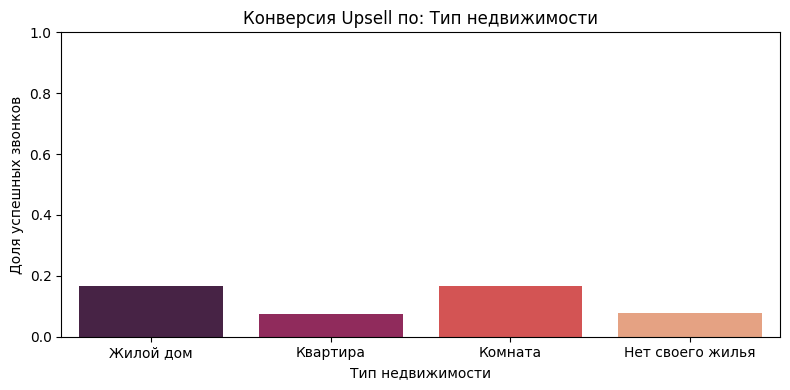


üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Upsell –ø–æ: –†–µ–≥–∏–æ–Ω
region_size
msk      0.087379
rural    0.094203
town     0.081034
urban    0.050000
Name: success, dtype: float64


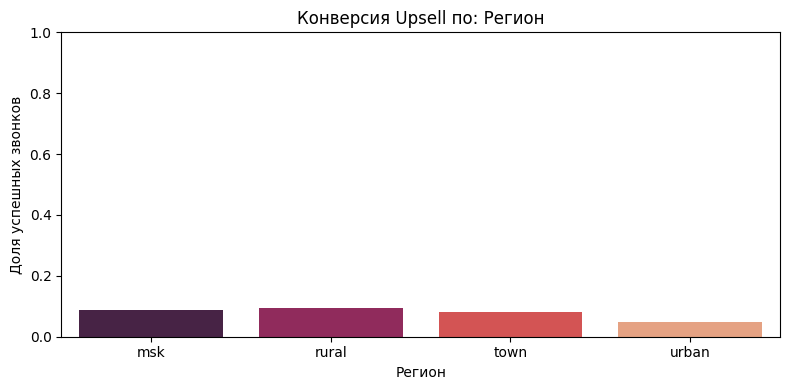


üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Upsell –ø–æ: –ù–∞–ª–∏—á–∏–µ –∞–≤—Ç–æ
auto_flg
0.0    0.090517
1.0    0.065858
Name: success, dtype: float64


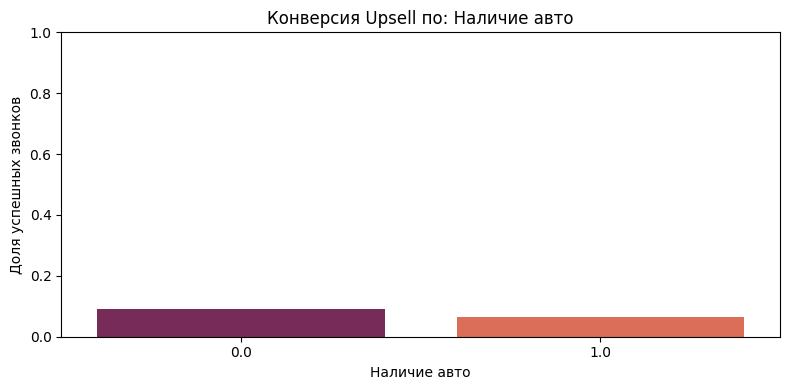


üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Upsell –ø–æ: –í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞
age_group
<25      0.063025
25‚Äì35    0.071795
36‚Äì50    0.084848
51‚Äì65    0.113924
65+      0.000000
Name: success, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_35608\2725422141.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = upsell_df.groupby(col)['success'].mean()


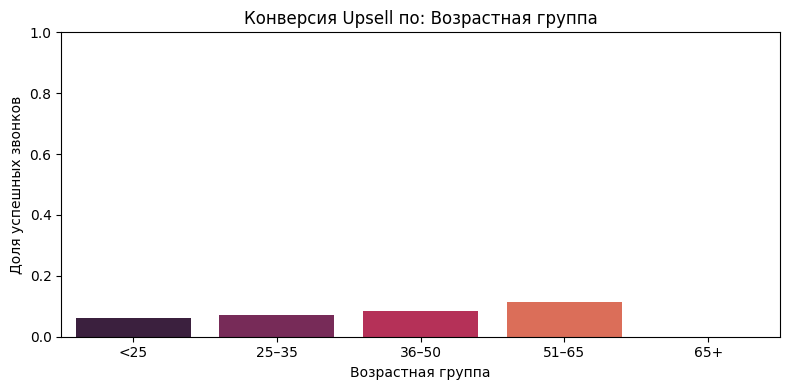

In [50]:
def analyze_upsell_response(df):
    """
    –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç –æ—Ç–∫–ª–∏–∫ –Ω–∞ –∑–≤–æ–Ω–∫–∏ —Å —Ü–µ–ª—å—é Upsell –ø–æ:
    - —Ç–∏–ø—É –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏
    - —Ä–µ–≥–∏–æ–Ω—É
    - –Ω–∞–ª–∏—á–∏—é –∞–≤—Ç–æ–º–æ–±–∏–ª—è
    - –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º
    """
    df = df.copy()
    upsell_df = df[df['functional_cd'] == 'Upsell'].copy()

    if upsell_df.empty:
        print("‚ùå –ù–µ—Ç –∑–≤–æ–Ω–∫–æ–≤ —Å —Ç–∏–ø–æ–º 'Upsell'.")
        return

    upsell_df.loc[:, 'success'] = upsell_df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False, na=False)

    if upsell_df['success'].sum() == 0:
        print("‚ö†Ô∏è –ù–µ—Ç —É—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤ –ø–æ Upsell.")
        return

    # –í–æ–∑—Ä–∞—Å—Ç–Ω—ã–µ –≥—Ä—É–ø–ø—ã
    bins = [0, 25, 35, 50, 65, 100]
    labels = ['<25', '25‚Äì35', '36‚Äì50', '51‚Äì65', '65+']
    upsell_df.loc[:, 'age_group'] = pd.cut(upsell_df['age'], bins=bins, labels=labels)

    # –ü—Ä–∏–∑–Ω–∞–∫–∏
    features = {
        'realty_type': '–¢–∏–ø –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏',
        'region_size': '–†–µ–≥–∏–æ–Ω',
        'auto_flg': '–ù–∞–ª–∏—á–∏–µ –∞–≤—Ç–æ',
        'age_group': '–í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞'
    }

    for col, title in features.items():
        grouped = upsell_df.groupby(col)['success'].mean()

        print(f"\nüìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è Upsell –ø–æ: {title}")
        print(grouped)

        plt.figure(figsize=(8, 4))
        sns.barplot(x=grouped.index.astype(str), y=grouped.values, hue=grouped.index, palette='rocket', legend=False)
        plt.title(f'–ö–æ–Ω–≤–µ—Ä—Å–∏—è Upsell –ø–æ: {title}')
        plt.ylabel('–î–æ–ª—è —É—Å–ø–µ—à–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤')
        plt.xlabel(title)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()

analyze_upsell_response(df_full)


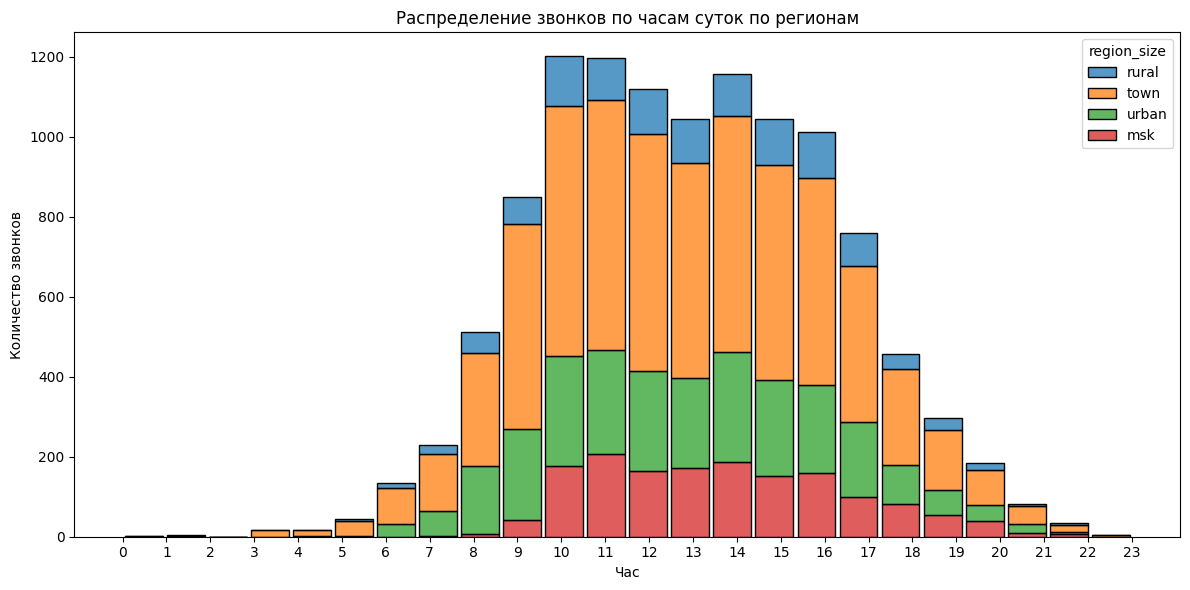

In [52]:
def plot_calls_by_hour_and_region(df):
    """
    –°—Ç—Ä–æ–∏—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–≤–æ–Ω–∫–æ–≤ –ø–æ —á–∞—Å–∞–º —Å—É—Ç–æ–∫ –∏ —Ä–µ–≥–∏–æ–Ω–∞–º
    –ü–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ü–µ–Ω–∏—Ç—å, –ª–æ–∫–∞–ª—å–Ω–æ–µ –ª–∏ –≤—Ä–µ–º—è
    """
    df = df.copy()
    df['hour'] = df['finish_dttm'].dt.hour

    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='hour', hue='region_size', multiple='stack', bins=24, shrink=0.9)
    plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–≤–æ–Ω–∫–æ–≤ –ø–æ —á–∞—Å–∞–º —Å—É—Ç–æ–∫ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º")
    plt.xlabel("–ß–∞—Å")
    plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤")
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()

plot_calls_by_hour_and_region(df_full)


C:\Users\admin\AppData\Local\Temp\ipykernel_35608\1663228736.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


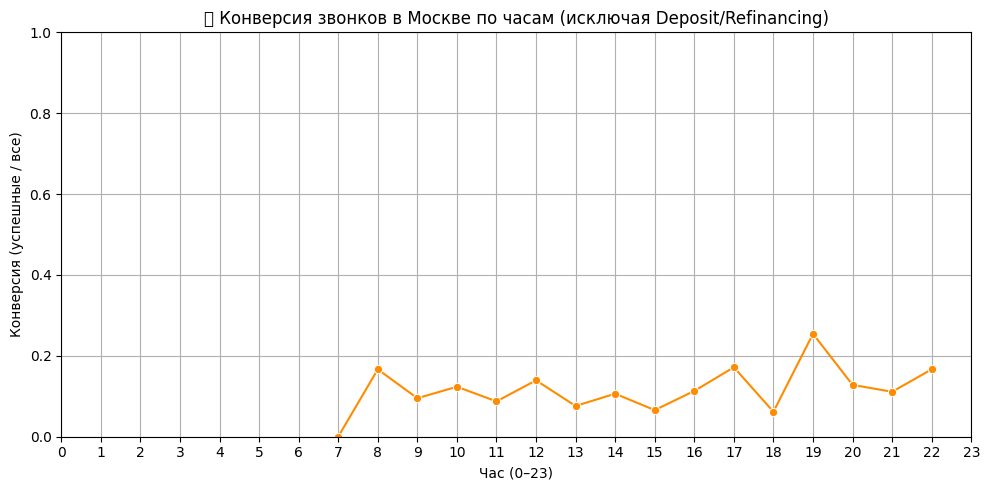

      count  sum  conversion
hour                        
7         3    0    0.000000
8         6    1    0.166667
9        42    4    0.095238
10      178   22    0.123596
11      206   18    0.087379
12      165   23    0.139394
13      171   13    0.076023
14      188   20    0.106383
15      152   10    0.065789
16      159   18    0.113208
17       99   17    0.171717
18       81    5    0.061728
19       55   14    0.254545
20       39    5    0.128205
21        9    1    0.111111
22        6    1    0.166667


In [54]:
def plot_msk_conversion_by_hour(df):
    """
    –ü–æ–∫–∞–∑—ã–≤–∞–µ—Ç –∫–æ–Ω–≤–µ—Ä—Å–∏—é –ø–æ —á–∞—Å–∞–º —Å—É—Ç–æ–∫ –≤ –ú–æ—Å–∫–≤–µ
    –¥–ª—è –≤—Å–µ—Ö —Ç–∏–ø–æ–≤ –∑–≤–æ–Ω–∫–æ–≤, –∫—Ä–æ–º–µ Deposit –∏ Refinancing
    """
    df = df.copy()

    excluded = ['Deposit', 'Refinancing']
    df = df[(df['region_size'] == 'msk') & (~df['functional_cd'].isin(excluded))]

    # –ú–µ—Ç–∫–∞ —É—Å–ø–µ—Ö–∞
    df['success'] = df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False, na=False)
    df['hour'] = df['finish_dttm'].dt.hour

    # –ö–æ–Ω–≤–µ—Ä—Å–∏—è –ø–æ —á–∞—Å–∞–º
    hourly_stats = df.groupby('hour')['success'].agg(['count', 'sum'])
    hourly_stats['conversion'] = hourly_stats['sum'] / hourly_stats['count']

    # –ì—Ä–∞—Ñ–∏–∫
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=hourly_stats.index, y=hourly_stats['conversion'], marker='o', color='darkorange')
    plt.title("üìä –ö–æ–Ω–≤–µ—Ä—Å–∏—è –∑–≤–æ–Ω–∫–æ–≤ –≤ –ú–æ—Å–∫–≤–µ –ø–æ —á–∞—Å–∞–º (–∏—Å–∫–ª—é—á–∞—è Deposit/Refinancing)")
    plt.xlabel("–ß–∞—Å (0‚Äì23)")
    plt.ylabel("–ö–æ–Ω–≤–µ—Ä—Å–∏—è (—É—Å–ø–µ—à–Ω—ã–µ / –≤—Å–µ)")
    plt.xticks(range(0, 24))
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(hourly_stats[['count', 'sum', 'conversion']])

plot_msk_conversion_by_hour(df_full)


In [55]:
from statsmodels.stats.proportion import proportions_ztest

def compare_conversion_hours(df, h1, h2):
    """
    –°—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç –∫–æ–Ω–≤–µ—Ä—Å–∏—é –º–µ–∂–¥—É –¥–≤—É–º—è —á–∞—Å–∞–º–∏ —Å –ø–æ–º–æ—â—å—é Z-—Ç–µ—Å—Ç–∞
    """
    df = df.copy()
    df = df[df['region_size'] == 'msk']
    df = df[~df['functional_cd'].isin(['Deposit', 'Refinancing'])]

    df['success'] = df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ', case=False, na=False)
    df['hour'] = df['finish_dttm'].dt.hour

    conv1 = df[df['hour'] == h1]['success']
    conv2 = df[df['hour'] == h2]['success']

    success = [conv1.sum(), conv2.sum()]
    nobs = [conv1.count(), conv2.count()]

    stat, pval = proportions_ztest(success, nobs)

    print(f"üìä –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏: {h1}:00 vs {h2}:00")
    print(f"–£—Å–ø–µ—à–Ω—ã–µ: {success}")
    print(f"–í—Å–µ–≥–æ –∑–≤–æ–Ω–∫–æ–≤: {nobs}")
    print(f"Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = {stat:.4f}, p-value = {pval:.4f}")

    if pval < 0.05:
        print("‚úÖ –†–∞–∑–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ (p < 0.05)")
    else:
        print("‚ö†Ô∏è –†–∞–∑–ª–∏—á–∏–µ –ù–ï –∑–Ω–∞—á–∏–º–æ (p >= 0.05)")

compare_conversion_hours(df_full, 18, 19)


üìä –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏: 18:00 vs 19:00
–£—Å–ø–µ—à–Ω—ã–µ: [np.int64(5), np.int64(14)]
–í—Å–µ–≥–æ –∑–≤–æ–Ω–∫–æ–≤: [np.int64(81), np.int64(55)]
Z-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ = -3.1832, p-value = 0.0015
‚úÖ –†–∞–∑–ª–∏—á–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ (p < 0.05)


In [57]:
print(df['wo_hit_status_result_desc'].str.contains('–£—Å–ø–µ—à–Ω–æ').sum() / len(df))

0.12931357337756139
